# 🧪 Prueba de Hipótesis 2: Proporción de Actividad Física

**Objetivo:** Verificar si la proporción de personas que realizan actividad física difiere significativamente entre quienes tienen diagnóstico de diabetes y quienes no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

sns.set(style="whitegrid")

In [2]:
# Cargar datos
data = pd.read_csv('datasets/diabetes_health_indicators.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Revisar columnas para identificar la variable de actividad física
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
# Construir tabla de contingencia
# Se asume que la columna se llama 'PhysActivity'
contingency = pd.crosstab(data['Diabetes_012'], data['PhysActivity'])
print(contingency)

PhysActivity    0.0     1.0
Diabetes_012               
0.0           47212  166491
1.0            1489    3142
2.0           13059   22287


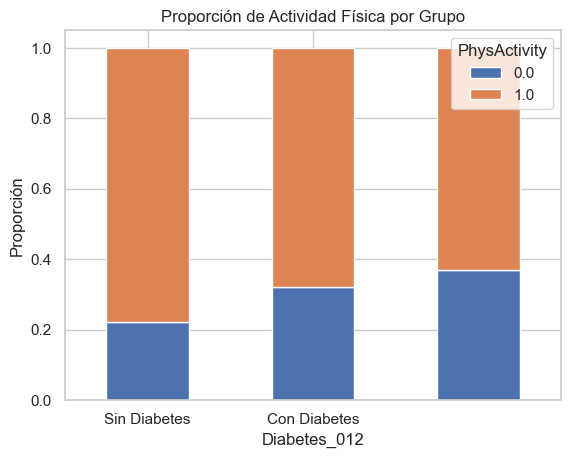

In [5]:
# Visualización de proporciones
contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
contingency_norm.plot(kind='bar', stacked=True)
plt.xticks([0,1], ['Sin Diabetes', 'Con Diabetes'], rotation=0)
plt.title('Proporción de Actividad Física por Grupo')
plt.ylabel('Proporción')
plt.show()

In [6]:
# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Estadístico chi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")

if p < 0.05:
    print("Se rechaza H0: Hay diferencia significativa en la proporción de actividad física.")
else:
    print("No se rechaza H0: No hay evidencia de diferencia significativa.")

Estadístico chi-cuadrado: 3789.3015
p-valor: 0.0000
Se rechaza H0: Hay diferencia significativa en la proporción de actividad física.
